In [274]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sb
import matplotlib as mpl

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [3]:
# check the iowa file location for your computer 
iowa_file = '../../DSI-SF-3/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [4]:
print iowa.info()
iowa.describe()
#iowa.isnull().apply(sum, axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

/Users/nehemiahloury/anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [5]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

The "State Bottle Cost", "State Bottle Retail", and "Sale (Dollars)" columns all need to be cleaned in order to remove the $ sign so that they can be treated as float instead of as objects. Additionally, it looks like there are some missing values in the County, County Number, Category, and Category Name that should be dealt with.

### 3.2 Clean the columns

In [6]:
def remove_dollars(col):
    return map(lambda x: x.translate(None, "$"), col)

dollar_cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
iowa[dollar_cols] = iowa[dollar_cols].apply(remove_dollars)
iowa[dollar_cols] = iowa[dollar_cols].apply(pd.to_numeric)
iowa["Date"] = pd.to_datetime(iowa["Date"])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [7]:
# Drop Rows with Missing Values
iowa = iowa.dropna(axis=0, how='any')

# Make Year, Month Columns
iowa["Year"], iowa["Month"] = iowa["Date"].dt.year, iowa["Date"].dt.month

<font size="3" color="red">since this is a large dataset and not a majority of the data has null values it is ok to drop rows w/ null values.. if you have a large portion of null values it is good practice to either impute the median or variance or even better to input a normal distribution with a median and std deviation that that particular column has</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [63]:
# 2015 only subset
iowa_2015 = iowa.loc[iowa['Year'] == 2015,:]

# Number of Months Open in 2015
months_open_2015 = iowa_2015[['Store Number', 'Month']].drop_duplicates().sort_values(by=['Store Number', 'Month']).groupby('Store Number').size()
months_open_2015

# List of Stores open the full year
open_all_2015 = months_open_2015[months_open_2015 == 12]
print open_all_2015.head()

# Create annualized Factor for each store
annualized_factor_2015 = 12/months_open_2015
annualized_factor_2015

Store Number
2106    12
2113    12
2130    12
2152    12
2178    12
dtype: int64


Store Number
2106     1.000000
2113     1.000000
2130     1.000000
2152     1.000000
2178     1.000000
2190     1.000000
2191     1.000000
2200     1.000000
2205     1.000000
2228     1.000000
2233     1.000000
2238     1.090909
2248     1.000000
2285     1.000000
2290     1.000000
2327     1.000000
2353     1.000000
2367     2.000000
2413     1.000000
2445     1.000000
2448     1.000000
2459     1.000000
2460     1.000000
2465     1.000000
2475     1.000000
2478     1.000000
2487     1.090909
2498     1.090909
2500     1.000000
2501     1.000000
          ...    
5180     3.000000
5181     6.000000
5182     4.000000
5183     4.000000
5185     4.000000
5186    12.000000
5187     4.000000
5188     6.000000
5189    12.000000
5190     4.000000
5191    12.000000
5192    12.000000
5193    12.000000
5196     6.000000
5198     6.000000
5199     6.000000
5201    12.000000
5203    12.000000
5204     6.000000
5205    12.000000
5206    12.000000
5207    12.000000
5212    12.000000
5213    12.0000

For stores that were not open for the entirety of 2015, I created an annualized factor which is 12/(number of months open). We can multiply this by the annual numbers for each store to get an approximation of what they would look like if the store was open for the entire year. If the store was open the whole year then the annualized factor will simply be 1.

I also created a list of stores that were open all of 2015 so we can easily subset the data to look at just these store if we do not want to include the annualized numbers of the partially open stores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [87]:
# Calculate 2015 Sales
sales_2015 = pd.pivot_table(iowa_2015, index='Store Number', values='Sale (Dollars)', aggfunc=sum)

# Calculate Annualized Sales
sales_2015_annualized = pd.concat([sales_2015, annualized_factor_2015], axis=1, join='inner').reset_index()
sales_2015_annualized = sales_2015_annualized.rename(columns={0: 'Annualized Factor'})
sales_2015_annualized['Annualized Sales'] = sales_2015_annualized['Sale (Dollars)'] * sales_2015_annualized['Annualized Factor']
sales_2015_annualized.sort_values(by='Annualized Sales', ascending=False).head()

,Store Number,Sale (Dollars),Annualized Factor,Annualized Sales
125,2633,997924.42,1.0,997924.42
1032,4829,874664.18,1.0,874664.18
194,3385,439584.35,1.0,439584.35
36,2512,419534.61,1.0,419534.61
200,3420,348837.36,1.0,348837.36


### 5.2 Calculate the profit each store is making in 2015.


In [391]:
# Create Total Cost and Profit Column Column
iowa_2015['Total Cost'] = iowa_2015['Bottles Sold'] * iowa_2015['State Bottle Cost']
iowa_2015['Profit'] = iowa_2015['Sale (Dollars)'] - iowa_2015['Total Cost']

# Calculate 2015 Profit
profit_2015 = pd.pivot_table(iowa_2015, index='Store Number', values='Profit', aggfunc=sum)


# Calculate Annualized Profit
profit_2015_annualized = pd.concat([profit_2015, annualized_factor_2015], axis=1, join='inner').reset_index()
profit_2015_annualized = profit_2015_annualized.rename(columns={0: 'Annualized Factor'})
profit_2015_annualized['Annualized Profit'] = profit_2015_annualized['Profit'] * profit_2015_annualized['Annualized Factor']
profit_2015_annualized.sort_values(by='Annualized Profit', ascending=False).head()

/Users/nehemiahloury/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nehemiahloury/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Store Number,Profit,Annualized Factor,Annualized Profit
125,2633,332863.87,1.0,332863.87
1032,4829,291813.75,1.0,291813.75
194,3385,147084.62,1.0,147084.62
36,2512,140072.72,1.0,140072.72
200,3420,116532.24,1.0,116532.24


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [392]:
iowa_county_2015 = iowa_2015.groupby('County')[['Volume Sold (Gallons)', 'Profit']].sum().reset_index()
iowa_county_2015['Profit Per Gallon'] = iowa_county_2015['Profit'] / iowa_county_2015['Volume Sold (Gallons)']
iowa_county_2015.sort_values(by='Profit Per Gallon', ascending=False).head(10)

,County,Volume Sold (Gallons),Profit,Profit Per Gallon
24,Dallas,7927.89,167728.26,21.156734
51,Johnson,27958.19,574002.02,20.530729
76,Polk,109269.47,2134012.43,19.529814
81,Scott,35216.02,681600.54,19.354843
50,Jefferson,1446.20,27896.95,19.289829
28,Des Moines,6808.22,129030.70,18.952193
96,Woodbury,17823.96,334211.18,18.750669
91,Washington,2569.91,48061.68,18.701698
10,Buena Vista,3111.79,57988.42,18.635069
63,Marshall,4991.56,92581.96,18.547701


<font size="3" color="red">Like the fact that you put this into a dataframe!</font>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

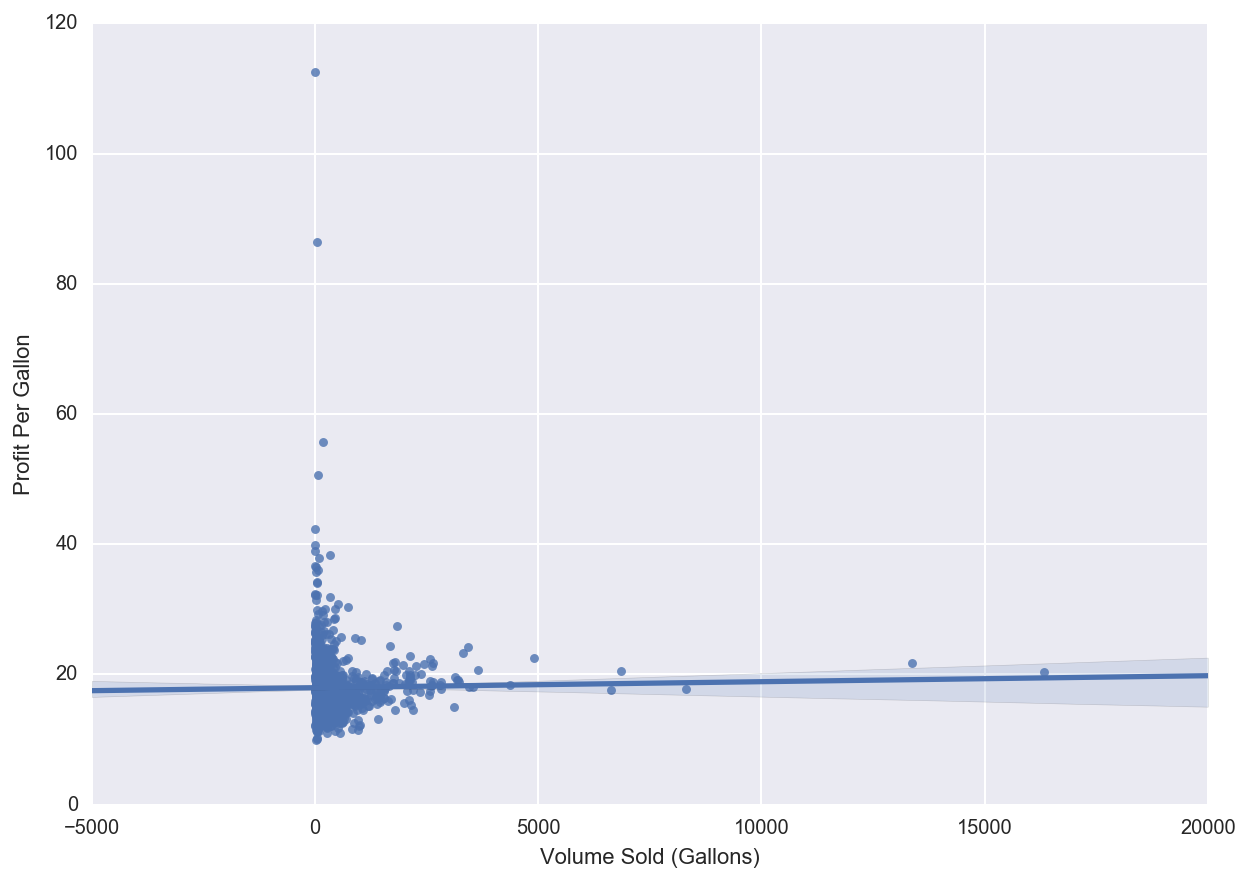

In [115]:
store_size_2015 = iowa_2015.groupby('Store Number')[['Volume Sold (Gallons)', 'Profit']].sum().reset_index()
store_size_2015['Profit Per Gallon'] = store_size_2015['Profit'] / store_size_2015['Volume Sold (Gallons)']
mpl.pyplot.figure(figsize=(10,7))
sb.regplot(data=store_size_2015, x='Volume Sold (Gallons)', y='Profit Per Gallon')

It appears that the profit to store size (measured in total number of gallons sold) ratio is fairly consistent as store size increases as shown by the graph above.

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [395]:
iowa['Broad Category'] = iowa['Category Name'].apply(lambda x: x.lower())
categories = pd.Series(iowa['Broad Category'].unique())
new_cat = ['brandies','whiskies','gin','tequila','schnapps','vodka','liqueur',
           'rum','amaretto','creme','beer','scotch','bourbon']
category_dict = {}
for category in new_cat:
    category_dict[category] = list(categories[categories.apply(lambda x: category in x)])

for key, item in category_dict.items():
    iowa.loc[iowa['Broad Category'].isin(item),'Broad Category'] = key

iowa.loc[iowa['Broad Category'] == 'japanese whisky','Broad Category'] = 'whiskies'
iowa.loc[iowa['Broad Category'].isin(['distilled spirits specialty','triple sec','american cocktails', 'anisette',
                                      'decanters & specialty packages','rock & rye']),'Broad Category'] = 'other'

iowa['Broad Category'].head(10)

0    brandies
1    whiskies
2    whiskies
3       other
4       vodka
5         gin
6    brandies
7    whiskies
8       vodka
9    schnapps
Name: Broad Category, dtype: object

### 5.7 Do relationships exist between the broader liquor type and profit?

,Broad Category,Volume Sold (Gallons),Profit,Profit Per Gallon
0,amaretto,2979.66,37565.77,12.607402
1,american alcohol,1143.97,25539.62,22.325428
2,beer,0.40,95.18,237.950000
3,bourbon,142.93,6885.63,48.174841
4,brandies,19733.09,484104.35,24.532618


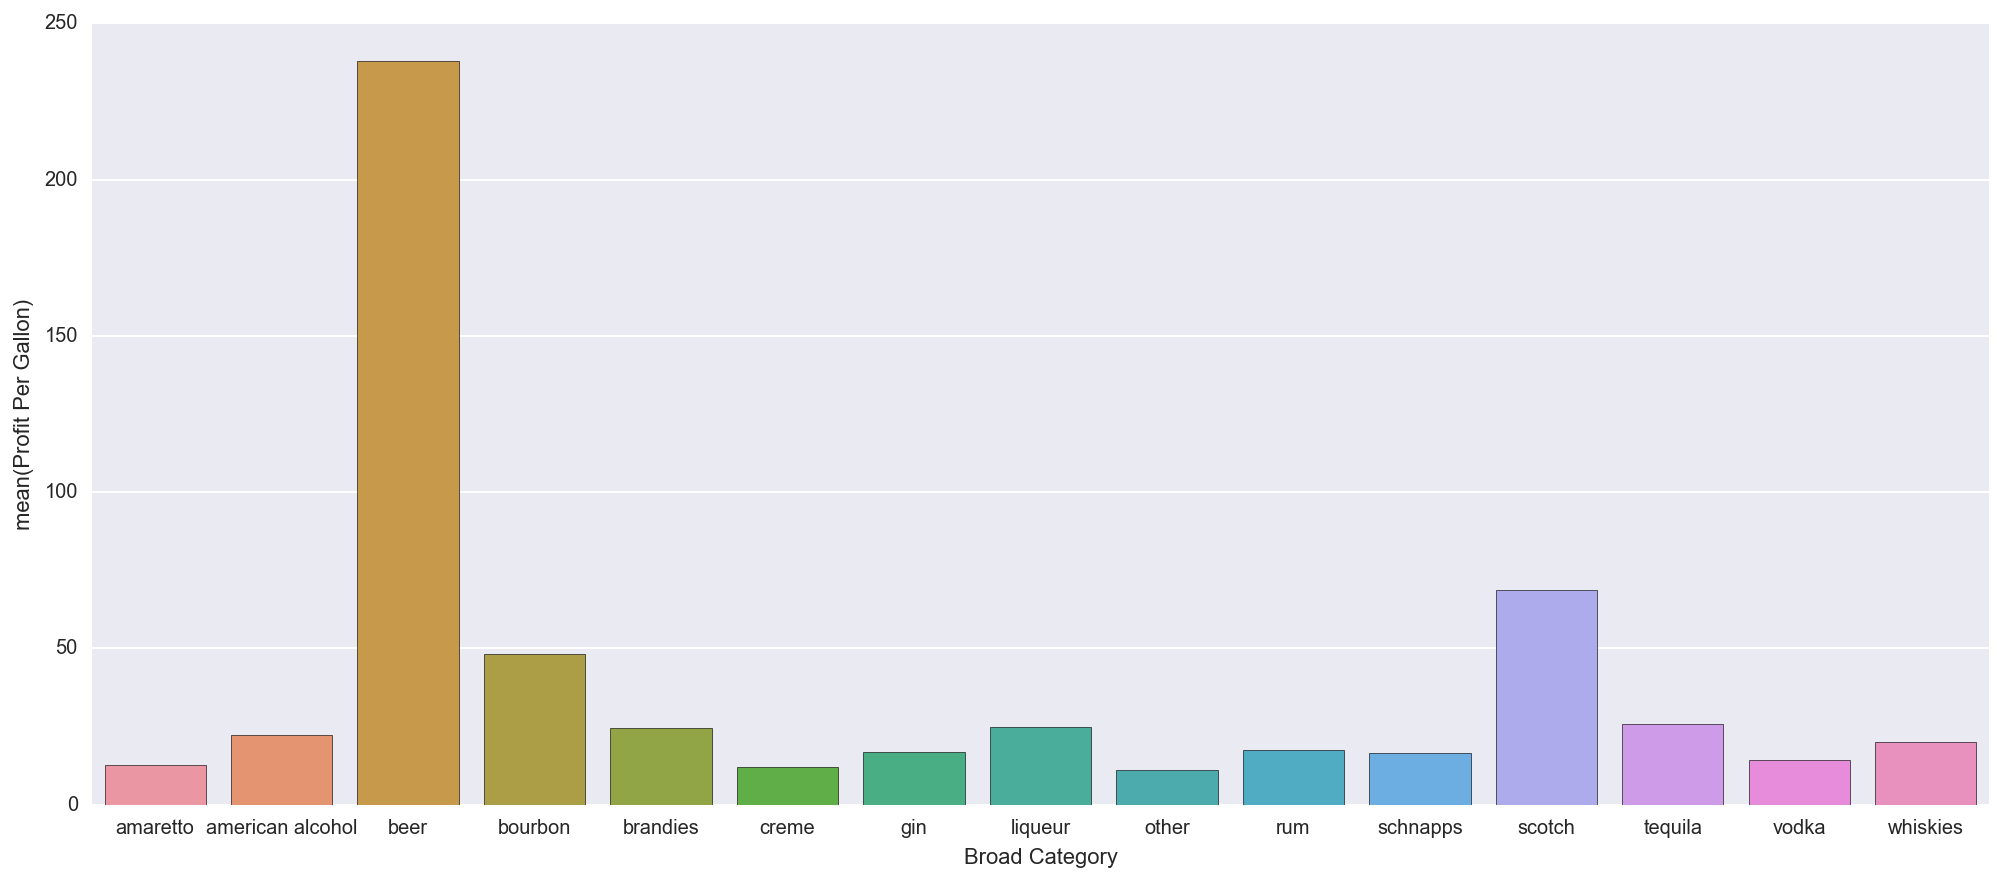

In [373]:
# Create Total Cost and Profit Column Column
iowa['Total Cost'] = iowa['Bottles Sold'] * iowa['State Bottle Cost']
iowa['Profit'] = iowa['Sale (Dollars)'] - iowa['Total Cost']

# Create Proper Dataset
liquor_profit = iowa.groupby('Broad Category')[['Volume Sold (Gallons)', 'Profit']].sum().reset_index()
liquor_profit['Profit Per Gallon'] = liquor_profit['Profit'] / liquor_profit['Volume Sold (Gallons)']

# Plot
mpl.pyplot.figure(figsize=(17,7))
sb.barplot(data=liquor_profit, x='Broad Category', y='Profit Per Gallon')

In [174]:
iowa[iowa['Broad Category'] == 'beer']

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Broad Category,Total Cost,Profit
23586,2015-11-11,2548,ALTOONA,50009,77.0,Polk,1501100.0,HIGH PROOF BEER - AMERICAN,80,903903,...,142.76,1,142.76,0.75,0.2,2015,11,beer,95.17,47.59
131594,2015-11-12,3762,WINDSOR HEIGHTS,50322,77.0,Polk,1501100.0,HIGH PROOF BEER - AMERICAN,80,903903,...,142.76,1,142.76,0.75,0.2,2015,11,beer,95.17,47.59


Looks like beer, bourbon, and scotch are the most profitable liquor types per gallon. Important to note however, that there are only two sales for beer in the entire dataset so it may be profitable, but it may not be particularly profitable.

<font size="3" color="red">Good explanation, a scatter plot will show more of a trend then a bargraph!</font>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

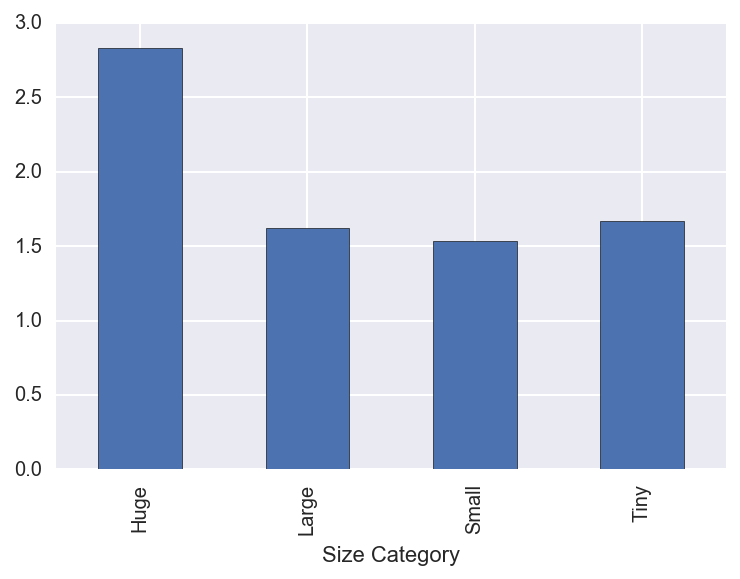

In [261]:
# Calculate 2015 Size
size_2015 = pd.pivot_table(iowa_2015, index='Store Number', values='Volume Sold (Gallons)', aggfunc=sum)


# Calculate Annualized Size
size_2015_annualized = pd.concat([size_2015, annualized_factor_2015], axis=1, join='inner').reset_index()
size_2015_annualized = size_2015_annualized.rename(columns={0: 'Annualized Factor'})
size_2015_annualized['Annualized Size'] = size_2015_annualized['Volume Sold (Gallons)'] * size_2015_annualized['Annualized Factor']
size_2015_annualized = size_2015_annualized.sort_values(by='Annualized Size', ascending=False).reset_index(drop=True)


# Create Size Catagories
def size_category(data, x):
    if x < data.quantile(.25):
        return "Tiny"
    if x >= data.quantile(.25) and x < data.quantile(.5):
        return "Small"
    if x >= data.quantile(.5) and x < data.quantile(.75):
        return "Large"
    if x >= data.quantile(.75):
        return "Huge"
    
store_size = size_2015_annualized["Volume Sold (Gallons)"]
size_2015_annualized["Size Category"] = store_size.apply(lambda x: size_category(store_size, x))

# Add Size Category to Original Data Set
size_dict = dict(zip(size_2015_annualized['Store Number'],size_2015_annualized['Size Category']))

def store_num_to_size(store_num):
    return size_dict[store_num]

iowa_2015.loc[:,'Size Category'] = iowa_2015.loc[:,'Store Number'].apply(lambda x: store_num_to_size(x))

# Check Volume per Sale
iowa_2015.groupby('Size Category').mean()['Volume Sold (Gallons)'].plot(kind = 'bar')

We see that large stores tend to sell larger amounts of alcohol during each sale, so perhaps the tax board could tax large alcohol purchases more heavily, which would disproportionately affect larger stores.

<font size="3" color="red">Question asks:how to tax without explicitly taxing stores based on size or county critera. You are solely using the size of the store to figure out how to tax. Instead think about taxing the alcohol that is most profitable based on how much alcohol they sell total.</font>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [269]:
iowa['Q1 2015'] = 0
iowa['Q1 2016'] = 0
iowa.loc[iowa['Month'].isin([1,2,3]) & (iowa['Year'] == 2015), 'Q1 2015'] = 1
iowa.loc[iowa['Month'].isin([1,2,3]) & (iowa['Year'] == 2016), 'Q1 2016'] = 1
iowa.head(30)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Broad Category,Total Cost,Profit,Q1 2015,Q1 2016
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,81.00,9.00,2.38,2015,11,brandies,54.00,27.00,0,0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,41.26,1.50,0.40,2016,3,whiskies,27.50,13.76,0,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,453.36,24.00,6.34,2016,2,whiskies,302.16,151.20,0,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,85.50,10.50,2.77,2016,2,other,57.00,28.50,0,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,129.60,21.00,5.55,2015,8,vodka,86.40,43.20,0,0
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,119.88,10.50,2.77,2015,4,gin,79.92,39.96,0,0
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,29.97,2.25,0.59,2015,8,brandies,19.98,9.99,0,0
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,47.26,3.50,0.92,2015,6,whiskies,31.50,15.76,0,0
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,68.96,3.00,0.79,2016,1,vodka,45.96,23.00,0,1
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,22.86,2.00,0.53,2015,11,schnapps,15.24,7.62,0,0


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

I'll look at YoY growth in Total Sales for the counties that are in the top 50% of counties by Total Sales.

In [320]:
iowa_q1 = iowa[(iowa['Q1 2015'] == 1) | (iowa['Q1 2016'] == 1)]
county_q1_sales = iowa_q1.groupby(['County', 'Year'])[['Sale (Dollars)']].agg(sum).reset_index()

# Find Counties in Top 50% of Sales in Q1 2016
county_q1_2016_sales = county_q1_sales[county_q1_sales['Year'] == 2016]
c_2016_sales = county_q1_2016_sales['Sale (Dollars)']
top_50_counties = county_q1_2016_sales[c_2016_sales > c_2016_sales.median()]['County']

# Sort Top Sales Counties by YoY Growth
top_county_q1_sales = county_q1_sales[county_q1_sales['County'].isin(top_50_counties)]
top_county_q1_sales = top_county_q1_sales.pivot(index='County', columns='Year', values='Sale (Dollars)').reset_index()
top_county_q1_sales['YoY Growth'] = top_county_q1_sales[2016]/top_county_q1_sales[2015]
top_county_q1_sales.sort_values(by='YoY Growth', ascending=False, inplace=True)
top_county_q1_sales.head(10)

Year,County,2015,2016,YoY Growth
8,Cedar,9921.67,19784.55,1.994075
18,Fayette,20536.94,37410.63,1.821626
12,Crawford,21061.60,37531.00,1.781963
0,Appanoose,15228.09,21396.23,1.405050
14,Delaware,16399.38,22209.06,1.354262
7,Cass,20777.44,27786.26,1.337328
40,Sioux,29256.00,38913.05,1.330088
28,Lee,82436.47,99200.88,1.203362
13,Dallas,104911.32,125159.91,1.193007
42,Union,20605.66,24120.43,1.170573


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

Based on my metric, I recommend Cedar county. It is in the top 50% of counties by market size (Total sales) and it has the highest YoY growth of any of those counties so it has both a large and a rapidly expanding market.

<font size="3" color="red">Show your work and plot a bar graph.. it would help visualize your explanation.</font>

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

1. I would recommend selling scotch because although the beer catagory produces a higher profit, it has only two sales total in our dataset, suggesting that it is not very popular.

In [330]:
iowa_scotch = iowa[iowa['Broad Category'] == 'scotch']

iowa_q1_scotch = iowa_scotch[(iowa_scotch['Q1 2015'] == 1) | (iowa_scotch['Q1 2016'] == 1)]
county_q1_sales_scotch = iowa_q1_scotch.groupby(['County', 'Year'])[['Sale (Dollars)']].agg(sum).reset_index()

# Find Counties in Top 50% of Sales of Scotch in Q1 2016
county_q1_2016_sales_scotch = county_q1_sales_scotch[county_q1_sales_scotch['Year'] == 2016]
c_2016_sales_scotch = county_q1_2016_sales_scotch['Sale (Dollars)']
top_50_counties_scotch = county_q1_2016_sales_scotch[c_2016_sales_scotch > c_2016_sales_scotch.median()]['County']

top_county_q1_sales[top_county_q1_sales['County'].isin(top_50_counties_scotch)]

Year,County,2015,2016,YoY Growth
40,Sioux,29256.00,38913.05,1.330088
28,Lee,82436.47,99200.88,1.203362
13,Dallas,104911.32,125159.91,1.193007
31,Marion,38527.89,44534.36,1.155899
37,Pottawattamie,232538.02,264784.42,1.138672
9,Cerro Gordo,111299.13,125052.92,1.123575
26,Johnson,322143.10,359432.36,1.115754
48,Woodbury,230724.79,249186.97,1.080018
46,Webster,77404.05,82915.97,1.071210
33,Muscatine,63175.92,64859.05,1.026642


2. I would now recommend Sioux county because its residents seem to enjoy scotch (it was in the top 50% of counties by scotch sales) and it still has a good YoY growth.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


Do people buy more beer during holiday time (December and January)?

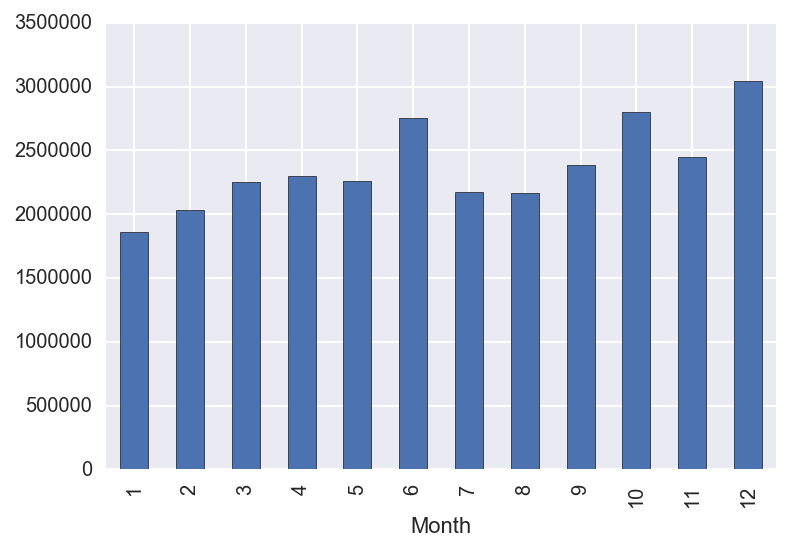

In [334]:
# 2015 Only Subset
iowa_2015 = iowa.loc[iowa['Year'] == 2015,:]

total_sales_2015_by_month = iowa_2015.groupby('Month')['Sale (Dollars)'].sum()
total_sales_2015_by_month.plot(kind = 'bar')

We see that sales are the highest in December, but actually the lowest in January. It seems that if there is a spike in sales during holidays, it occurs during the end of the year and disappears at the beginning.

Do people buy more alcohol on the weekend?

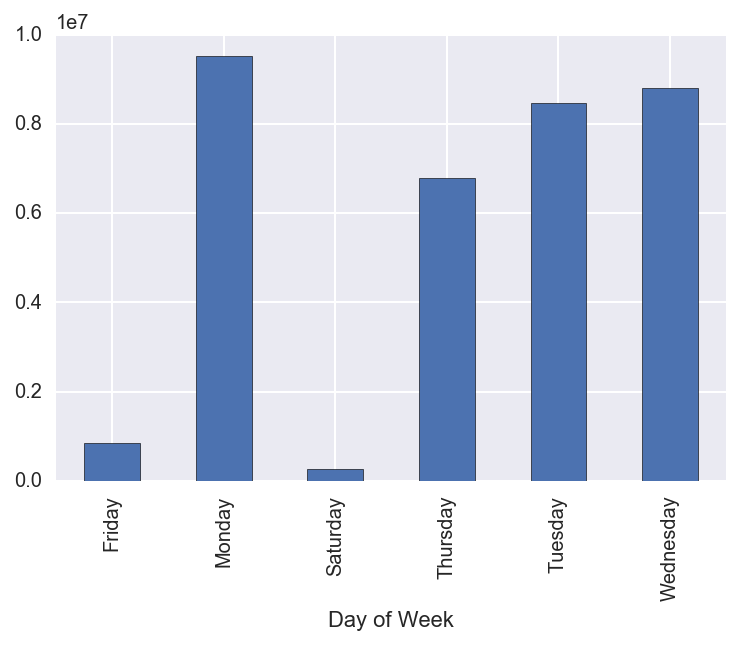

In [344]:
# Make Day of Week column
import calendar
iowa['Day of Week'] = iowa.Date.apply(lambda x: calendar.day_name[x.weekday()])

# Total Sales by Day of Week
total_sales_2015_by_day_of_week = iowa.groupby('Day of Week')['Sale (Dollars)'].sum()
total_sales_2015_by_day_of_week.plot(kind = 'bar')

Actually it looks like Friday and Saturday are the least popular days for purchasing alcohol.

What is the most popular day for purchaing alcohol?

Using the graphic above, it's clear that Monday is the most popular day followed by Wednesday and then Tuesday. Monday may be the most popular because stores seem to be closed on Sunday

<font size="3" color="red">Nice analysis, interesting that on Monday people buy the most alcohol</font>

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [389]:
# Calculate Liquor Costs
cost_per_gallon = iowa_scotch['Total Cost'].sum()/iowa_scotch['Volume Sold (Gallons)'].sum()
liquor_cost = 20000 * cost_per_gallon
total_cost = liquor_cost + 150000
print round(total_cost, 2)

# Find revenue per gallon for scotch
liquor_revenue = iowa.groupby('Broad Category')[['Volume Sold (Gallons)', 'Sale (Dollars)']].sum().reset_index()
liquor_revenue['Revenue Per Gallon'] = liquor_revenue['Sale (Dollars)'] / liquor_revenue['Volume Sold (Gallons)']
scotch_revenue = liquor_revenue.loc[liquor_revenue['Broad Category'] == 'scotch','Revenue Per Gallon']


# Find Gallons Per Day Per Store in Sioux
iowa_sioux = iowa[(iowa['County'] == 'Sioux')]
gallons = iowa_sioux['Volume Sold (Gallons)'].sum()
days = (iowa_sioux['Date'].max() - iowa_sioux['Date'].min()).days
stores = len(iowa_sioux['Store Number'].unique())
gallons_day_store = gallons / (days * stores)

# Calculate Recoup Time in Days
print total_cost/(gallons_day_store * scotch_revenue)
print 'A casual 40 years to get his investment back. May want to make different assumptions about the amount of gallons he can sell per day.'

2895352.75
11    14300.219837
Name: Revenue Per Gallon, dtype: float64
A casual 40 years to get his investment back. May want to make different assumptions about the amount of gallons he can sell per day.


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Year', u'Month', u'Broad Category', u'Total Cost', u'Profit',
       u'Q1 2015', u'Q1 2016', u'Day of Week'],
      dtype='object')